<a href="https://colab.research.google.com/github/NauaneLopes/Citologia_Oral/blob/main/PDI_Primeiros_passos.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
# abrir google drive
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


# Processamento inicial

In [ ]:
# Biblioteca utilizada
import os
import pandas as pd
import random
import cv2
import numpy as np
from tqdm import tqdm
from collections import Counter
import matplotlib.pyplot as plt
from skimage.measure import label, regionprops


#

In [ ]:
# Dataset base
base_in = "/content/drive/MyDrive/Dados_citologia/nuclei_images"

In [ ]:
# Conjuntos existentes
subsets = ['train', 'val', 'test']

# Classes de interesse
classes_desejadas = {'normal', 'abnormal', 'blood', 'out_of_focus', 'reactive'}

# Extensões dos dados
extensoes_validas = ['.jpg', '.jpeg', '.png', '.tif']

# Contador geral
total_geral = 0

for subset in subsets:
    caminho_subset = os.path.join(base_in, subset)
    total_subset = 0
    print(f"\nSubset: {subset}")

    for classe in os.listdir(caminho_subset):
        if classe not in classes_desejadas:
            continue

        caminho_classe = os.path.join(caminho_subset, classe)
        if not os.path.isdir(caminho_classe):
            continue

        num_imagens = len([
            f for f in os.listdir(caminho_classe)
            if os.path.isfile(os.path.join(caminho_classe, f)) and
               os.path.splitext(f)[-1].lower() in extensoes_validas
        ])

        print(f"  Classe: {classe} - {num_imagens} imagens")
        total_subset += num_imagens

    print(f" Total no subset {subset}: {total_subset} imagens")
    total_geral += total_subset

print(f"\nTotal geral (somente nas 5 classes): {total_geral} imagens")



Subset: train
  Classe: abnormal - 16387 imagens
  Classe: blood - 5794 imagens
  Classe: normal - 6000 imagens
  Classe: out_of_focus - 16852 imagens
  Classe: reactive - 1326 imagens
 Total no subset train: 46359 imagens

Subset: val
  Classe: abnormal - 3012 imagens
  Classe: blood - 1236 imagens
  Classe: normal - 1040 imagens
  Classe: out_of_focus - 3350 imagens
  Classe: reactive - 478 imagens
 Total no subset val: 9116 imagens

Subset: test
  Classe: abnormal - 3340 imagens
  Classe: blood - 1338 imagens
  Classe: normal - 1246 imagens
  Classe: out_of_focus - 3662 imagens
  Classe: reactive - 460 imagens
 Total no subset test: 10046 imagens

Total geral (somente nas 5 classes): 65521 imagens


In [ ]:
# Etratificar tamanho das imagens
base_in_rgb = '/content/drive/MyDrive/RESULTADOS/nuclei_images_normalizadas_RGB'

In [ ]:
# Verificar tamanho das imagens

# Subsets e classes desejadas
subsets = ['train', 'val', 'test']

# Contador de dimensões
dim_counter = Counter()

for subset in subsets:
    subset_path = os.path.join(base_in_rgb, subset)

    for classe in os.listdir(subset_path):
        if classe not in classes_desejadas:
            continue

        classe_path = os.path.join(subset_path, classe)

        for nome_arquivo in tqdm(os.listdir(classe_path), desc=f"{subset}/{classe}"):
            if not nome_arquivo.lower().endswith(('.jpg', '.jpeg', '.png', '.tif')):
                continue

            img_path = os.path.join(classe_path, nome_arquivo)
            img = cv2.imread(img_path)

            if img is None:
                continue  # ignora a imagem corrompida ou inválida

            h, w = img.shape[:2]
            dim_counter[(w, h)] += 1

# Mostrar estatísticas
print("\n Dimensões das imagens (largura x altura) e suas quantidades:")
for dimensao, quantidade in dim_counter.most_common():
    print(f"{dimensao[0]}×{dimensao[1]} → {quantidade} imagens")

print(f"\n Total de imagens processadas: {sum(dim_counter.values())}")
print(f" N° de dimensões únicas encontradas: {len(dim_counter)}")


test/blood: 100%|██████████| 1338/1338 [00:09<00:00, 145.29it/s]


 Dimensões das imagens (largura x altura) e suas quantidades:
256×256 → 32761 imagens
48×48 → 53 imagens
48×45 → 49 imagens
48×53 → 43 imagens
48×51 → 42 imagens
46×47 → 42 imagens
49×53 → 42 imagens
52×54 → 41 imagens
47×49 → 41 imagens
46×45 → 41 imagens
47×45 → 40 imagens
52×50 → 40 imagens
49×47 → 40 imagens
52×51 → 39 imagens
47×48 → 39 imagens
47×46 → 39 imagens
45×48 → 39 imagens
54×55 → 38 imagens
50×48 → 38 imagens
45×45 → 37 imagens
46×49 → 37 imagens
47×52 → 37 imagens
45×49 → 37 imagens
45×50 → 37 imagens
54×51 → 36 imagens
41×40 → 36 imagens
51×54 → 36 imagens
46×42 → 36 imagens
51×50 → 35 imagens
48×50 → 35 imagens
49×50 → 35 imagens
50×51 → 35 imagens
47×50 → 34 imagens
43×44 → 34 imagens
53×52 → 34 imagens
54×50 → 34 imagens
46×48 → 34 imagens
50×47 → 34 imagens
48×46 → 34 imagens
49×49 → 34 imagens
51×49 → 33 imagens
50×53 → 33 imagens
50×50 → 33 imagens
51×51 → 33 imagens
48×47 → 33 imagens
52×52 → 33 imagens
55×52 → 33 imagens
44×45 → 33 imagens
53×49 → 32 imagens
5

Segmentação (histograma - corte canais altos (realçar canais baixos), algoritmo global básico e Otsu

('/content/drive/MyDrive/RESULTADOS/representacao_aleatoria_segmentacao_otsu.png',
 '/content/drive/MyDrive/RESULTADOS/limiares_otsu_por_imagem.csv')

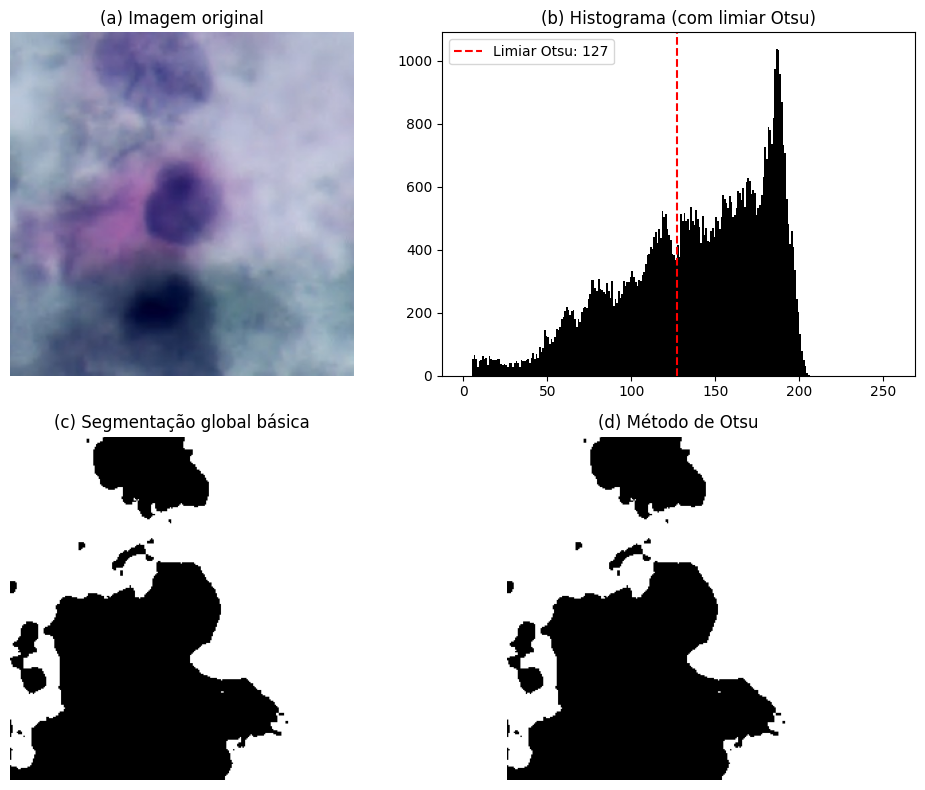

In [ ]:
# CORRETO
# Caminhos
base_out = "/content/drive/MyDrive/RESULTADOS/nuclei_images_segmentadas_otsu"
csv_limiar_path = "/content/drive/MyDrive/RESULTADOS/limiares_otsu_por_imagem.csv"

# Subconjuntos e classes de interesse
subconjuntos = ['train', 'val', 'test']
classes_desejadas = {'normal', 'abnormal', 'blood', 'out_of_focus', 'reactive'}
extensoes_validas = ('.jpg', '.jpeg', '.png', '.tif')

# Lista para armazenar limiares
limiares = []
imagens_processadas = []

for subset in subconjuntos:
    for classe in os.listdir(os.path.join(base_in_rgb, subset)):
        if classe not in classes_desejadas:
            continue

        in_path = os.path.join(base_in_rgb, subset, classe)
        out_path = os.path.join(base_out, subset, classe)
        os.makedirs(out_path, exist_ok=True)

        for nome_arquivo in os.listdir(in_path):
            if not nome_arquivo.lower().endswith(extensoes_validas):
                continue

            caminho_img = os.path.join(in_path, nome_arquivo)
            img = cv2.imread(caminho_img)

            if img is None:
                continue

            # Convert to grayscale
            gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)

            # Apply Otsu threshold
            limiar, mask = cv2.threshold(gray, 0, 255, cv2.THRESH_BINARY + cv2.THRESH_OTSU)
            mask = np.where(mask > 0, 255, 0).astype(np.uint8)

            # Salvar máscara
            caminho_out = os.path.join(out_path, nome_arquivo)
            cv2.imwrite(caminho_out, mask)

            # Salvar limiar
            limiares.append({
                "subset": subset,
                "classe": classe,
                "nome_imagem": nome_arquivo,
                "limiar_otsu": limiar
            })

            imagens_processadas.append((img, gray, mask, limiar))

# Salvar CSV com limiares
df_limiar = pd.DataFrame(limiares)
df_limiar.to_csv(csv_limiar_path, index=False)

# Selecionar uma imagem aleatória para visualização estilo Figura 10.39
img_rgb, img_gray, img_mask, limiar_sel = random.choice(imagens_processadas)
_, mask_global = cv2.threshold(img_gray, 127, 255, cv2.THRESH_BINARY)

# Criar figura com os 4 painéis
fig, axs = plt.subplots(2, 2, figsize=(10, 8))

axs[0, 0].imshow(cv2.cvtColor(img_rgb, cv2.COLOR_BGR2RGB))
axs[0, 0].set_title("(a) Imagem original")
axs[0, 0].axis("off")

axs[0, 1].hist(img_gray.ravel(), bins=256, range=[0, 256], color='black')
axs[0, 1].axvline(x=limiar_sel, color='red', linestyle='--', label=f'Limiar Otsu: {int(limiar_sel)}')
axs[0, 1].legend()
axs[0, 1].set_title("(b) Histograma (com limiar Otsu)")

axs[1, 0].imshow(mask_global, cmap='gray')
axs[1, 0].set_title("(c) Segmentação global básica")
axs[1, 0].axis("off")

axs[1, 1].imshow(img_mask, cmap='gray')
axs[1, 1].set_title("(d) Método de Otsu")
axs[1, 1].axis("off")

plt.tight_layout()
plt_path_final = "/content/drive/MyDrive/RESULTADOS/representacao_aleatoria_segmentacao_otsu.png"
plt.savefig(plt_path_final)

plt_path_final, csv_limiar_path


In [ ]:
# As máscaras para serem binarizadas devem ser salvas em png.
import os
import cv2
import numpy as np
from tqdm import tqdm
import pandas as pd

# Diretório de entrada com máscaras .jpg (com artefatos)
mask_dir_jpg = "/content/drive/MyDrive/RESULTADOS/nuclei_images_segmentadas_otsu"

# Diretório de saída com máscaras binárias .png
mask_dir_png = "/content/drive/MyDrive/RESULTADOS/mascaras_binarias_png"

# Subconjuntos e classes
subconjuntos = ['train', 'val', 'test']
classes_desejadas = ['normal', 'abnormal', 'blood', 'out_of_focus', 'reactive']

# Lista para registrar problemas
problemas = []

for subset in subconjuntos:
    for classe in classes_desejadas:
        pasta_in = os.path.join(mask_dir_jpg, subset, classe)
        pasta_out = os.path.join(mask_dir_png, subset, classe)
        os.makedirs(pasta_out, exist_ok=True)

        if not os.path.exists(pasta_in):
            continue

        for nome_arquivo in tqdm(os.listdir(pasta_in), desc=f"Processando: {subset}/{classe}"):
            if not nome_arquivo.lower().endswith('.jpg'):
                continue

            caminho_in = os.path.join(pasta_in, nome_arquivo)
            caminho_out = os.path.join(pasta_out, nome_arquivo.replace('.jpg', '.png'))

            # Ler em grayscale
            mask = cv2.imread(caminho_in, cv2.IMREAD_GRAYSCALE)
            if mask is None:
                continue

            # Binarizar explicitamente (0 e 255)
            mask_bin = np.where(mask >= 128, 255, 0).astype(np.uint8)

            # Salvar como PNG (sem compressão com perda)
            cv2.imwrite(caminho_out, mask_bin)

            # Verificar valores únicos da imagem salva
            verificada = cv2.imread(caminho_out, cv2.IMREAD_GRAYSCALE)
            valores = np.unique(verificada)

            if not set(valores.tolist()).issubset({0, 255}):
                problemas.append({
                    "subset": subset,
                    "classe": classe,
                    "arquivo": nome_arquivo,
                    "valores_encontrados": valores.tolist()
                })

# Salvar relatório de problemas (se houver)
if problemas:
    df_problemas = pd.DataFrame(problemas)
    relatorio_csv = "/content/drive/MyDrive/RESULTADOS/relatorio_mascaras_nao_binarias.csv"
    df_problemas.to_csv(relatorio_csv, index=False)
    print(f"\n Máscaras com problema foram salvas no relatório: {relatorio_csv}")
else:
    print("\n Todas as máscaras foram convertidas corretamente e são binárias.")


Processando: test/reactive: 100%|██████████| 460/460 [00:18<00:00, 25.34it/s]


 Todas as máscaras foram convertidas corretamente e são binárias.


In [ ]:
import cv2
import numpy as np

# Caminho da máscara
caminho_mask = "/content/drive/MyDrive/RESULTADOS/mascaras_binarias_png/test/normal/bbox_6_2020_11_30__12_37__0826_b0s0c0x547200-1600y96000-1200m32822.png"
# Ler a imagem em escala de cinza
mask = cv2.imread(caminho_mask, cv2.IMREAD_GRAYSCALE)

# Verifica se a imagem foi carregada corretamente
if mask is None:
    raise ValueError("A máscara não pôde ser carregada.")

# Obter os valores únicos da imagem
valores_unicos = np.unique(mask)
print("Valores únicos encontrados na máscara:", valores_unicos)

# Verificar se a máscara é binária
if set(valores_unicos.tolist()).issubset({0, 255}):
    print(" A máscara é binária (contém apenas 0 e 255).")
else:
    print(" A máscara NÃO é binária (contém outros valores).")


Valores únicos encontrados na máscara: [  0 255]
✅ A máscara é binária (contém apenas 0 e 255).


# Extração de features

Features Morfológicas (derivadas das máscaras segmentadas):
* Área;
* Perímetro;
* Circularidade;
* Excentricidade;
* Compacidade;
* Número de Regiões;
* Raio Equivalente;
* Retângulo Envolvente (BBox);
* Elongação;
* Extensão;
* Razão Área / Perímetro.




In [ ]:
import os # CORRETA
import cv2
import numpy as np
import pandas as pd
from tqdm import tqdm
from skimage.measure import label, regionprops

# Caminhos
base_mask = "/content/drive/MyDrive/RESULTADOS/mascaras_binarias_png"
csv_out = "/content/drive/MyDrive/RESULTADOS/features/f_morf_completas.csv"

# Subconjuntos e classes
subconjuntos = ['train', 'val', 'test']
classes_desejadas = ['normal', 'abnormal', 'blood', 'out_of_focus', 'reactive']
extensoes = ('.png', '.jpg', '.jpeg', '.tif')

# Lista para armazenar resultados
dados = []

for subset in subconjuntos:
    for classe in classes_desejadas:
        pasta = os.path.join(base_mask, subset, classe)
        if not os.path.exists(pasta):
            continue

        for nome_arq in tqdm(os.listdir(pasta), desc=f"{subset}/{classe}"):
            if not isinstance(nome_arq, str) or not nome_arq.lower().endswith(extensoes):
                continue

            caminho = os.path.join(pasta, nome_arq)
            mask = cv2.imread(caminho, cv2.IMREAD_GRAYSCALE)
            if mask is None:
                continue

            # Garantir binarização
            mask_bin = np.where(mask >= 128, 1, 0).astype(np.uint8)

            label_img = label(mask_bin)
            props = regionprops(label_img)

            # Inicializar listas para features por região
            areas, perimetros, circularidades = [], [], []
            excentricidades, bbox_ratios = [], []
            compactness, raios_equiv = [], []
            extensoes_list, elongacoes, area_perimetro = [], [], []

            for p in props:
                a = p.area
                per = p.perimeter
                circ = 4 * np.pi * a / (per**2) if per > 0 else 0
                exc = p.eccentricity
                bbox_ratio = p.bbox_area / a if a > 0 else 0
                comp = (per**2) / a if a > 0 else 0
                raio = np.sqrt(a / np.pi)
                ext = a / p.bbox_area if p.bbox_area > 0 else 0
                elong = p.major_axis_length / p.minor_axis_length if p.minor_axis_length > 0 else 0
                a_per = a / per if per > 0 else 0

                areas.append(a)
                perimetros.append(per)
                circularidades.append(circ)
                excentricidades.append(exc)
                bbox_ratios.append(bbox_ratio)
                compactness.append(comp)
                raios_equiv.append(raio)
                extensoes_list.append(ext)
                elongacoes.append(elong)
                area_perimetro.append(a_per)

            dados.append({
                "subset": subset,
                "classe": classe,
                "nome_imagem": nome_arq,
                "num_regioes": len(props),
                "area_media": np.mean(areas) if areas else 0,
                "area_total": np.sum(areas) if areas else 0,
                "perimetro_medio": np.mean(perimetros) if perimetros else 0,
                "circularidade_media": np.mean(circularidades) if circularidades else 0,
                "excentricidade_media": np.mean(excentricidades) if excentricidades else 0,
                "bbox_ratio_medio": np.mean(bbox_ratios) if bbox_ratios else 0,
                "compactness_media": np.mean(compactness) if compactness else 0,
                "raio_equivalente_medio": np.mean(raios_equiv) if raios_equiv else 0,
                "extensao_media": np.mean(extensoes_list) if extensoes_list else 0,
                "elongacao_media": np.mean(elongacoes) if elongacoes else 0,
                "razao_area_perimetro": np.mean(area_perimetro) if area_perimetro else 0
            })

# Salvar CSV
df = pd.DataFrame(dados)
df.to_csv(csv_out, index=False)
csv_out


test/reactive: 100%|██████████| 460/460 [00:07<00:00, 57.50it/s]


'/content/drive/MyDrive/RESULTADOS/features/f_morf_completas.csv'

In [ ]:
df.head()

,subset,classe,nome_imagem,num_regioes,area_media,area_total,perimetro_medio,circularidade_media,excentricidade_media,bbox_ratio_medio,compactness_media,raio_equivalente_medio,extensao_media,elongacao_media,razao_area_perimetro
0,train,normal,bbox_1_2019_07_10__16_23__0048_b0s0c0x190282-1...,1,1564.000000,1564.0,148.468037,0.891622,0.688405,1.271739,14.093835,22.312254,0.786325,1.378690,10.534254
1,train,normal,center_7_2019_07_10__16_23__0048_b0s0c0x43489-...,8,5363.875000,42911.0,277.597109,1.634149,0.781008,1.409982,20.466603,16.136994,0.713466,1.932697,3.443782
2,train,normal,center_0_2019_07_10__16_23__0048_b0s0c0x135537...,3,15133.333333,45400.0,553.480928,1.028464,0.779675,1.400689,28.745536,41.771209,0.722662,2.494576,10.122090
3,train,normal,bbox_1_2019_07_10__16_23__0048_b0s0c0x79396-16...,1,2798.000000,2798.0,196.509668,0.910521,0.231627,1.265189,13.801304,29.843443,0.790395,1.027956,14.238485
4,train,normal,center_0_2019_07_10__16_23__0048_b0s0c0x185932...,7,1971.285714,13799.0,126.195661,2.347887,0.674772,1.205874,11.996042,17.096406,0.840812,1.219321,7.431035


Features Texturais (extraídas da imagem original dentro da máscara):
* GLCM: Contraste, Homogeneidade, Energia e Correlação;
* LBP;
* Entropia Local;
* Desvio padrão local;

Features Espectrais / de Intensidade (dentro da máscara segmentada):
* Intensidade média;
* Mediana e moda;
* Desvio padrão;
* Máximo e mínimo;
* Histogramas normalizados;
* Indices de cor (ex: R/B, G/B, R/G; e outros)

In [ ]:
import os  # REfazer - retornou arquivo vazio
import cv2
import numpy as np
import pandas as pd
from tqdm import tqdm
from glob import glob

# Diretórios de entrada
base_imagens = '/content/drive/MyDrive/RESULTADOS/nuclei_images_normalizadas_RGB'
base_masks =  "/content/drive/MyDrive/RESULTADOS/mascaras_binarias_png"

# Subconjuntos e classes de interesse
subconjuntos = ['train', 'val', 'test']
classes_desejadas = ['normal', 'abnormal', 'blood', 'out_of_focus', 'reactive']
extensoes_validas = ('.jpg', '.jpeg', '.png', '.tif')

# Lista para armazenar os dados
dados = []

for subset in subconjuntos:
    for classe in classes_desejadas:
        pasta_img = os.path.join(base_imagens, subset, classe)
        pasta_mask = os.path.join(base_masks, subset, classe)

        if not os.path.exists(pasta_img) or not os.path.exists(pasta_mask):
            continue

        for nome_arq in tqdm(os.listdir(pasta_img), desc=f"{subset}/{classe}"):
            if not nome_arq.lower().endswith(extensoes_validas):
                continue

            path_img = os.path.join(pasta_img, nome_arq)
            path_mask = os.path.join(pasta_mask, nome_arq)

            img = cv2.imread(path_img)  # RGB
            mask = cv2.imread(path_mask, cv2.IMREAD_GRAYSCALE)

            if img is None or mask is None:
                continue

            mask_bin = (mask == 255)

            # Inicializar dicionário de saída
            features = {
                "subset": subset,
                "classe": classe,
                "nome_imagem": nome_arq
            }

            # Calcular estatísticas por canal
            for i, canal in enumerate(['R', 'G', 'B']):
                canal_data = img[:, :, i][mask_bin]
                if canal_data.size == 0:
                    continue
                features[f'media_{canal}'] = np.mean(canal_data)
                features[f'mediana_{canal}'] = np.median(canal_data)
                features[f'moda_{canal}'] = np.bincount(canal_data).argmax() if np.bincount(canal_data).size > 0 else 0
                features[f'desvio_{canal}'] = np.std(canal_data)
                features[f'max_{canal}'] = np.max(canal_data)
                features[f'min_{canal}'] = np.min(canal_data)

                # Histograma normalizado
                hist, _ = np.histogram(canal_data, bins=256, range=(0, 256), density=True)
                for j, val in enumerate(hist):
                    features[f'hist_{canal}_{j}'] = val

            # Índices de cor (ex: R/G, R/B, G/B)
            R = features.get('media_R', 1e-6)
            G = features.get('media_G', 1e-6)
            B = features.get('media_B', 1e-6)

            features['R_G'] = R / (G + 1e-6)
            features['R_B'] = R / (B + 1e-6)
            features['G_B'] = G / (B + 1e-6)

            dados.append(features)

# Converter para DataFrame
df_final = pd.DataFrame(dados)

# Salvar como CSV
saida_csv = "/content/drive/MyDrive/RESULTADOS/features/f_espec_correta.csv"
df_final.to_csv(saida_csv, index=False)
saida_csv


test/reactive: 100%|██████████| 460/460 [00:08<00:00, 52.50it/s] 


'/content/drive/MyDrive/RESULTADOS/features/f_espec_RGB-correta.csv'

In [ ]:
import os
import cv2
import numpy as np
import pandas as pd
from scipy import stats
from tqdm import tqdm

# Configurações
conjuntos = ['train', 'val', 'test']
classes = ['normal', 'abnormal', 'blood', 'out_of_focus', 'reactive']
base_imagens ='/content/drive/MyDrive/RESULTADOS/nuclei_images_normalizadas_RGB'
base_mascaras =  "/content/drive/MyDrive/RESULTADOS/mascaras_binarias_png"

dados = []

# Loop pelos conjuntos e classes
for conjunto in conjuntos:
    for classe in classes:
        pasta_img = os.path.join(base_imagens, conjunto, classe)
        pasta_mask = os.path.join(base_mascaras, conjunto, classe)
        if not os.path.exists(pasta_img) or not os.path.exists(pasta_mask):
            continue
        for nome_img in tqdm(os.listdir(pasta_img)):
            if not nome_img.endswith(".jpg"):
                continue

            nome_base = os.path.splitext(nome_img)[0]
            nome_mask = nome_base + ".png"

            caminho_img = os.path.join(pasta_img, nome_img)
            caminho_mask = os.path.join(pasta_mask, nome_mask)

            if not os.path.exists(caminho_mask):
                continue

            img = cv2.imread(caminho_img)  # BGR
            img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
            mask = cv2.imread(caminho_mask, cv2.IMREAD_GRAYSCALE)

            if img is None or mask is None:
                continue

            mask_bin = mask == 255
            if np.sum(mask_bin) == 0:
                continue

            # Extrair por canal
            feature_dict = {
                'conjunto': conjunto,
                'classe': classe,
                'nome_imagem': nome_img,
            }

            for i, canal in enumerate(['R', 'G', 'B']):
                valores = img[:, :, i][mask_bin]
                feature_dict[f'{canal}_media'] = np.mean(valores)
                feature_dict[f'{canal}_mediana'] = np.median(valores)
                feature_dict[f'{canal}_moda'] = stats.mode(valores, keepdims=True)[0][0]
                feature_dict[f'{canal}_desvio'] = np.std(valores)
                feature_dict[f'{canal}_min'] = np.min(valores)
                feature_dict[f'{canal}_max'] = np.max(valores)

                # Histograma normalizado
                hist, _ = np.histogram(valores, bins=32, range=(0, 256), density=True)
                for j, val in enumerate(hist):
                    feature_dict[f'{canal}_hist_bin_{j}'] = val

            # Índices espectrais
            R = img[:, :, 0][mask_bin].astype(np.float32) + 1e-5
            G = img[:, :, 1][mask_bin].astype(np.float32) + 1e-5
            B = img[:, :, 2][mask_bin].astype(np.float32) + 1e-5
            feature_dict['R_div_B'] = np.mean(R / B)
            feature_dict['G_div_B'] = np.mean(G / B)
            feature_dict['R_div_G'] = np.mean(R / G)
            feature_dict['RG_div_2B'] = np.mean((R + G) / (2 * B))

            dados.append(feature_dict)

# Criar DataFrame
df_features = pd.DataFrame(dados)

# Exportar
caminho_saida = "/content/drive/MyDrive/RESULTADOS/features/f_esp_correta.csv"
df_features.to_csv(caminho_saida, index=False)

caminho_saida

100%|██████████| 460/460 [02:34<00:00,  2.98it/s]


'/content/drive/MyDrive/RESULTADOS/features/f_esp_correta.csv'

Features Espaciais e Distribuição:
* Centroides das regiões;
* Distância média entre centros;
* Desvio padrão das posições;
* Densidade por tile (ex: 100×100 px);
* Mapa de calor de distribuição (heatmap).

In [ ]:
import os # CORRETA
import cv2
import numpy as np
import pandas as pd
from tqdm import tqdm
from skimage.measure import regionprops, label
import matplotlib.pyplot as plt
import seaborn as sns

# Diretórios
base_masks = "/content/drive/MyDrive/RESULTADOS/mascaras_binarias_png"
subconjuntos = ['train', 'val', 'test']
classes_desejadas = ['normal', 'abnormal', 'blood', 'out_of_focus', 'reactive']
extensoes_validas = ('.jpg', '.jpeg', '.png', '.tif')

# Parâmetros
tile_size = 100  # para densidade por tile

dados = []

for subset in subconjuntos:
    for classe in classes_desejadas:
        pasta_mask = os.path.join(base_masks, subset, classe)

        if not os.path.exists(pasta_mask):
            continue

        for nome_arq in tqdm(os.listdir(pasta_mask), desc=f"{subset}/{classe}"):
            if not nome_arq.lower().endswith(extensoes_validas):
                continue

            path_mask = os.path.join(pasta_mask, nome_arq)
            mask = cv2.imread(path_mask, cv2.IMREAD_GRAYSCALE)
            if mask is None:
                continue

            bin_mask = (mask == 255).astype(np.uint8)
            labeled = label(bin_mask)
            props = regionprops(labeled)

            # Centroides
            centroides = np.array([p.centroid for p in props]) if props else np.empty((0, 2))
            num_regioes = len(centroides)

            # Distância média entre centroides
            if num_regioes > 1:
                dists = [np.linalg.norm(c1 - c2) for i, c1 in enumerate(centroides) for j, c2 in enumerate(centroides) if i < j]
                dist_media = np.mean(dists)
                std_pos = np.std(centroides, axis=0).mean()
            else:
                dist_media = 0
                std_pos = 0

            # Densidade por tile
            h, w = mask.shape
            tiles_y = h // tile_size
            tiles_x = w // tile_size

            # Criar tile_counts apenas se houver pelo menos um tile
            if tiles_y > 0 and tiles_x > 0:
                tile_counts = np.zeros((tiles_y, tiles_x), dtype=int)

                for cy, cx in centroides:
                    i = int(cy) // tile_size
                    j = int(cx) // tile_size
                    if i < tiles_y and j < tiles_x:
                        tile_counts[i, j] += 1

                densidade_max = tile_counts.max()
                densidade_media = tile_counts.mean()
            else:
                # Se não há tiles, a densidade é 0
                densidade_max = 0
                densidade_media = 0


            # Armazenar dados
            dados.append({
                "subset": subset,
                "classe": classe,
                "nome_imagem": nome_arq,
                "num_regioes": num_regioes,
                "distancia_media_centroides": dist_media,
                "desvio_padrao_posicoes": std_pos,
                "densidade_max_tile": densidade_max,
                "densidade_media_tiles": densidade_media
            })

# Criar DataFrame e salvar
df_spatial = pd.DataFrame(dados)
csv_saida = "/content/drive/MyDrive/RESULTADOS/features/f_espaciais.csv"
df_spatial.to_csv(csv_saida, index=False)

test/reactive: 100%|██████████| 460/460 [00:06<00:00, 73.61it/s]


Outras Features Derivadas:
* Intensidade fora da máscara;
* Relação sinal/fundo (contrast ratio);
* Textura entre bordas                 

In [ ]:
import os
import cv2
import numpy as np
import pandas as pd
from tqdm import tqdm
from skimage.filters import sobel

# Caminhos
base_imagens =  '/content/drive/MyDrive/RESULTADOS/nuclei_images_normalizadas_RGB'
base_masks = "/content/drive/MyDrive/RESULTADOS/mascaras_binarias_png"
subsets = ["train", "val", "test"]
classes_desejadas = {'normal', 'abnormal', 'blood', 'out_of_focus', 'reactive'}

dados = []

for subset in subsets:
    for classe in classes_desejadas:
        pasta_img = os.path.join(base_imagens, subset, classe)
        pasta_mask = os.path.join(base_masks, subset, classe)
        if not os.path.exists(pasta_img) or not os.path.exists(pasta_mask):
            continue

        imagens = [f for f in os.listdir(pasta_img) if f.lower().endswith('.jpg')]
        for nome_img in tqdm(imagens, desc=f"{subset}/{classe}"):
            nome_base = os.path.splitext(nome_img)[0]
            nome_mask = nome_base + ".png"
            path_img = os.path.join(pasta_img, nome_img)
            path_mask = os.path.join(pasta_mask, nome_mask)

            if not os.path.exists(path_mask):
                continue

            imagem = cv2.imread(path_img)
            mascara = cv2.imread(path_mask, cv2.IMREAD_GRAYSCALE)
            if imagem is None or mascara is None:
                continue

            mascara_bin = (mascara > 0).astype(np.uint8)

            linha = {
                "subset": subset,
                "classe": classe,
                "nome_imagem": nome_img
            }

            for canal, cor in enumerate(['R', 'G', 'B']):
                sinal = imagem[:, :, canal][mascara_bin == 1]
                fundo = imagem[:, :, canal][mascara_bin == 0]

                intensidade_sinal = np.mean(sinal) if len(sinal) > 0 else 0
                intensidade_fundo = np.mean(fundo) if len(fundo) > 0 else 0
                contraste = intensidade_sinal / (intensidade_fundo + 1e-6)

                bordas = sobel(mascara_bin)
                textura_borda = np.mean(imagem[:, :, canal][bordas > 0]) if np.any(bordas > 0) else 0

                linha[f'intensidade_sinal_{cor}'] = intensidade_sinal
                linha[f'intensidade_fundo_{cor}'] = intensidade_fundo
                linha[f'relacao_sinal_fundo_{cor}'] = contraste
                linha[f'textura_borda_{cor}'] = textura_borda

            dados.append(linha)

# Exibir resultado
df_rgb_derivadas = pd.DataFrame(dados)
csv_saida = "/content/drive/MyDrive/RESULTADOS/features/f_derivadas_CORRETAS.csv"
df_rgb_derivadas.to_csv(csv_saida, index=False)


test/abnormal: 100%|██████████| 3340/3340 [01:34<00:00, 35.32it/s]


In [ ]:
df_derivadas = pd.read_csv("/content/drive/MyDrive/RESULTADOS/features/f_derivadas_CORRETAS.csv")
df_derivadas.head()

,subset,classe,nome_imagem,intensidade_sinal_R,intensidade_fundo_R,relacao_sinal_fundo_R,textura_borda_R,intensidade_sinal_G,intensidade_fundo_G,relacao_sinal_fundo_G,textura_borda_G,intensidade_sinal_B,intensidade_fundo_B,relacao_sinal_fundo_B,textura_borda_B
0,train,out_of_focus,center_3_2019_07_10__16_23__0048_b0s0c0x99519-...,70.030741,153.778638,0.455400,114.836839,25.531219,128.315126,0.198973,76.270353,39.321756,125.585032,0.313109,82.358548
1,train,out_of_focus,bbox_1_2019_07_10__16_23__0048_b0s0c0x185976-1...,69.254581,142.318605,0.486616,107.659624,15.500964,71.831783,0.215795,43.561033,27.510125,113.433333,0.242522,69.687793
2,train,out_of_focus,bbox_2_2019_07_10__16_23__0048_b0s0c0x180174-1...,65.092926,111.968230,0.581352,89.453165,9.775180,44.456884,0.219880,27.817722,27.138489,89.458396,0.303364,57.091139
3,train,out_of_focus,center_4_2019_07_10__16_23__0048_b0s0c0x183092...,124.184530,169.528484,0.732529,144.783784,59.791120,132.887350,0.449938,97.496374,85.213487,131.425309,0.648380,106.563283
4,train,out_of_focus,bbox_3_2019_07_10__16_23__0048_b0s0c0x149969-1...,68.373154,102.828334,0.664925,86.348684,6.390964,36.760689,0.173853,21.173246,30.106864,70.147415,0.429194,51.164474


# União das features

In [ ]:
df_morf = pd.read_csv("/content/drive/MyDrive/RESULTADOS/features/f_morf_completas.csv") # features morfologicas
df_morf.head()

,subset,classe,nome_imagem,num_regioes,area_media,area_total,perimetro_medio,circularidade_media,excentricidade_media,bbox_ratio_medio,compactness_media,raio_equivalente_medio,extensao_media,elongacao_media,razao_area_perimetro
0,train,normal,bbox_1_2019_07_10__16_23__0048_b0s0c0x190282-1...,1,1564.000000,1564.0,148.468037,0.891622,0.688405,1.271739,14.093835,22.312254,0.786325,1.378690,10.534254
1,train,normal,center_7_2019_07_10__16_23__0048_b0s0c0x43489-...,8,5363.875000,42911.0,277.597109,1.634149,0.781008,1.409982,20.466603,16.136994,0.713466,1.932697,3.443782
2,train,normal,center_0_2019_07_10__16_23__0048_b0s0c0x135537...,3,15133.333333,45400.0,553.480928,1.028464,0.779675,1.400689,28.745536,41.771209,0.722662,2.494576,10.122090
3,train,normal,bbox_1_2019_07_10__16_23__0048_b0s0c0x79396-16...,1,2798.000000,2798.0,196.509668,0.910521,0.231627,1.265189,13.801304,29.843443,0.790395,1.027956,14.238485
4,train,normal,center_0_2019_07_10__16_23__0048_b0s0c0x185932...,7,1971.285714,13799.0,126.195661,2.347887,0.674772,1.205874,11.996042,17.096406,0.840812,1.219321,7.431035


In [ ]:
df_esp = pd.read_csv("/content/drive/MyDrive/RESULTADOS/features/f_esp_correta.csv")
df_esp.head() # FALTA FAZÊ-LA

,conjunto,classe,nome_imagem,R_media,R_mediana,R_moda,R_desvio,R_min,R_max,R_hist_bin_0,...,B_hist_bin_26,B_hist_bin_27,B_hist_bin_28,B_hist_bin_29,B_hist_bin_30,B_hist_bin_31,R_div_B,G_div_B,R_div_G,RG_div_2B
0,train,normal,bbox_1_2019_07_10__16_23__0048_b0s0c0x190282-1...,51.117647,46.5,37,16.779417,26,94,0.000000,...,0.0,0.0,0.0,0.0,0.0,0.0,0.513367,0.591323,0.867873,0.552345
1,train,normal,center_7_2019_07_10__16_23__0048_b0s0c0x43489-...,101.186083,103.0,106,29.912848,1,172,0.000536,...,0.0,0.0,0.0,0.0,0.0,0.0,0.689256,0.620034,1.172964,0.654645
2,train,normal,center_0_2019_07_10__16_23__0048_b0s0c0x135537...,93.166586,107.0,0,40.795013,0,159,0.005760,...,0.0,0.0,0.0,0.0,0.0,0.0,0.684894,0.397903,64411.860000,0.541398
3,train,normal,center_0_2019_07_10__16_23__0048_b0s0c0x185932...,51.499819,48.0,37,21.364050,2,119,0.000788,...,0.0,0.0,0.0,0.0,0.0,0.0,0.507425,0.455590,21575.451000,0.481507
4,train,normal,bbox_4_2019_07_10__16_23__0048_b0s0c0x77960-16...,63.766454,61.0,53,14.659081,32,109,0.000000,...,0.0,0.0,0.0,0.0,0.0,0.0,0.544583,0.705252,0.770098,0.624917


In [ ]:
df_espaciais = pd.read_csv("/content/drive/MyDrive/RESULTADOS/features/f_espaciais.csv")
df_espaciais.head()

,subset,classe,nome_imagem,num_regioes,distancia_media_centroides,desvio_padrao_posicoes,densidade_max_tile,densidade_media_tiles
0,train,normal,bbox_1_2019_07_10__16_23__0048_b0s0c0x190282-1...,1,0.000000,0.000000,0,0.00
1,train,normal,center_7_2019_07_10__16_23__0048_b0s0c0x43489-...,8,119.838943,67.748102,4,1.25
2,train,normal,center_0_2019_07_10__16_23__0048_b0s0c0x135537...,3,109.234497,52.462337,1,0.25
3,train,normal,bbox_1_2019_07_10__16_23__0048_b0s0c0x79396-16...,1,0.000000,0.000000,0,0.00
4,train,normal,center_0_2019_07_10__16_23__0048_b0s0c0x185932...,7,156.487932,77.166436,1,0.75
